Abbreviated data preparation for the Wine Quality Problem (Project 1)

In [1]:

# Import Required Libraries  
import matplotlib.pyplot as plt 
import numpy as np 
# This time we need to also import pandas
import pandas as pd 

# Read in white wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';') 

# Read in red wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

# Add `type` column to `red` with price one 
red['type'] = 1
  
# Add `type` column to `white` with price zero 
white['type'] = 0
  
# Append `white` to `red` 
# AFTER THIS WE HAVE ALL WINES (red and white) in a SINGLE pandas DataFrame
wines = red.append(white, ignore_index = True) 

# Import SKLEARN
import sklearn
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 

# Specify the  data - 
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

# Specify the QUALITY target labels and flatten the array 
y = np.ravel(wines.quality) 

# Splitting the data set for training and validating  
X_train, X_val, y_train, y_val = train_test_split( 
                 X, y, test_size = 0.25, random_state = 45) 

# CONVERTING X_train & X_test DataFrame s to TF tensors
# import tensorflow as tf 

Xtrain = X_train.to_numpy()
Xval = X_val.to_numpy()

 # NOW, IN ADDITION, CREATE THE TARGETS AS ONE-HOT-ENCODED 3 quality LEVELS

In [2]:
y_train[272:283]

array([5, 4, 6, 5, 5, 6, 7, 6, 5, 8, 5])

In [3]:
 # First create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3
yt1 = (y_train -4) /3
yt2 = (  ( yt1 + abs(yt1) ) /2 )
yt3 = (np.ceil(yt2)) + 1
train_labels = yt3.astype(int)

yv1 = (y_val -4) /3
yv2 = (  ( yv1 + abs(yv1) ) /2 )
yv3 = (np.ceil(yv2)) + 1
val_labels = yv3.astype(int)

In [4]:
train_labels[272:283]

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2])

In [5]:
# NOW, ONE-HOT ENCODING OF BOTH TARGET ARRAYS
# define a function to do the one-hot-encoding of output labels

def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels-1):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
#   Xtrain (4872, 12) ... y_train (4872,) ... one_hot_train_labels (4872,3)
 # FOR VALIDATING:
#   Xval (1625, 12) ... y_val (1625,) ... one_hot_val_labels (1625,3)

one_hot_train_labels[272:283,]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [118]:
white.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
337,5.8,0.27,0.27,12.30,0.045,55.0,170.0,0.99720,3.28,0.42,9.3,6,0
1285,7.8,0.16,0.41,1.70,0.026,29.0,140.0,0.99100,3.02,0.78,12.5,6,0
169,9.8,0.42,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5,0
1845,7.4,0.44,0.20,11.50,0.049,44.0,157.0,0.99800,3.27,0.44,9.0,5,0
2763,7.7,0.30,0.34,1.20,0.048,4.0,119.0,0.99084,3.18,0.34,12.1,6,0


In [6]:
from keras import models
from keras import layers

def clasmodl1():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)))
  #model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(3, activation='softmax'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [7]:
num_epochs = 50
# Build the Keras model (already compiled)
model1 = clasmodl1()
# Train the model (in silent mode, verbose=0)
history1 = model1.fit(Xtrain, one_hot_train_labels,validation_data=(Xval, one_hot_val_labels),
          epochs=num_epochs, batch_size=1, verbose=1)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(Xval, Xval, verbose=0)
#all_scores.append(val_mae)

training_loss1 = history1.history['loss']
#mae_history1 = history1.history['val_mae']
cat_history1 = history1.history['val_loss']

Epoch 1/50
4872/4872 [==============================] - 12s 2ms/step - loss: 0.6162 - accuracy: 0.8993 - val_loss: 0.5912 - val_accuracy: 0.9268
Epoch 2/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6365 - accuracy: 0.9029 - val_loss: 0.7955 - val_accuracy: 0.9268
Epoch 3/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6731 - accuracy: 0.8883 - val_loss: 0.6039 - val_accuracy: 0.9268
Epoch 4/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6776 - accuracy: 0.9016 - val_loss: 0.6633 - val_accuracy: 0.9274
Epoch 5/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6647 - accuracy: 0.9006 - val_loss: 0.6661 - val_accuracy: 0.9249
Epoch 6/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7148 - accuracy: 0.8976 - val_loss: 0.6246 - val_accuracy: 0.9274
Epoch 7/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7361 - accuracy: 0.8854 - val_loss: 0.7556 - val_ac

In [8]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_cat_history1 = smooth_curve(cat_history1)
smooth_train_history1 = smooth_curve(training_loss1)


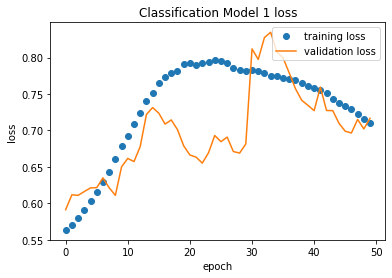

In [9]:

plt.plot(smooth_train_history1,'o')
plt.plot(smooth_cat_history1)
plt.title('Classification Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

In [123]:
def clasmodl2():
  # classification model with 3 hidden layers
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(3, activation='softmax'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [124]:
num_epochs2 = 50
# Build the Keras model (already compiled)
model2 = clasmodl2()
# Train the model (in silent mode, verbose=0)
history2 = model2.fit(Xtrain, one_hot_train_labels,validation_data=(Xval, one_hot_val_labels),
          epochs=num_epochs2, batch_size=1, verbose=1)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(Xval, Xval, verbose=0)
#all_scores.append(val_mae)

training_loss2 = history2.history['loss']
#mae_history2 = history2.history['val_mae']
mse_history2 = history2.history['val_loss']

#smooth_mse_history2 = smooth_curve(mse_history2)
#smooth_train_history2 = smooth_curve(training_loss2)

Epoch 1/50
4872/4872 [==============================] - 11s 2ms/step - loss: 0.7603 - accuracy: 0.9025 - val_loss: 1.0265 - val_accuracy: 0.9268
Epoch 2/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5833 - accuracy: 0.9209 - val_loss: 0.5316 - val_accuracy: 0.9268
Epoch 3/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5871 - accuracy: 0.9142 - val_loss: 0.6770 - val_accuracy: 0.9268
Epoch 4/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5435 - accuracy: 0.9194 - val_loss: 0.4765 - val_accuracy: 0.9268
Epoch 5/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5652 - accuracy: 0.9271 - val_loss: 0.5882 - val_accuracy: 0.9268
Epoch 6/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5717 - accuracy: 0.9300 - val_loss: 0.8207 - val_accuracy: 0.9268
Epoch 7/50
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5721 - accuracy: 0.9326 - val_loss: 0.3395 - val_ac

In [125]:
smooth_mse_history2 = smooth_curve(mse_history2)
smooth_train_history2 = smooth_curve(training_loss2)

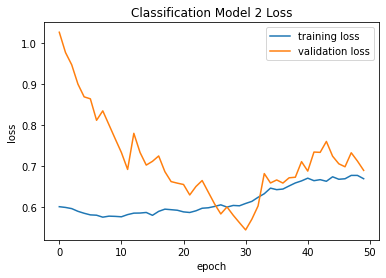

In [126]:
plt.plot(smooth_train_history2)
plt.plot(smooth_mse_history2)
#plt.plot(mse_history2)
plt.title('Classification Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

In [127]:
def clasmodl3():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(3, activation='softmax'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [149]:
num_epochs3 = 30
# Build the Keras model (already compiled)
model3 = clasmodl3()
# Train the model (in silent mode, verbose=0)
history3 = model3.fit(Xtrain, one_hot_train_labels,validation_data=(Xval, one_hot_val_labels),
          epochs=num_epochs3, batch_size=1, verbose=1)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(Xval, Xval, verbose=0)
#all_scores.append(val_mae)

training_loss3 = history3.history['loss']
#mae_history3 = history3.history['val_mae']
mse_history3 = history3.history['val_loss']

#smooth_mse_history3 = smooth_curve(mse_history3)

Epoch 1/30
4872/4872 [==============================] - 11s 2ms/step - loss: 1.5729 - accuracy: 0.9119 - val_loss: 0.4639 - val_accuracy: 0.9268
Epoch 2/30
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7118 - accuracy: 0.9328 - val_loss: 0.4233 - val_accuracy: 0.9268
Epoch 3/30
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7257 - accuracy: 0.9077 - val_loss: 1.1283 - val_accuracy: 0.9268
Epoch 4/30
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7704 - accuracy: 0.9013 - val_loss: 1.0394 - val_accuracy: 0.9268
Epoch 5/30
4872/4872 [==============================] - 10s 2ms/step - loss: 0.8178 - accuracy: 0.8995 - val_loss: 0.5701 - val_accuracy: 0.9268
Epoch 6/30
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7478 - accuracy: 0.9066 - val_loss: 0.7166 - val_accuracy: 0.9268
Epoch 7/30
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6999 - accuracy: 0.9131 - val_loss: 0.4765 - val_ac

In [150]:
smooth_mse_history3 = smooth_curve(mse_history3)
smooth_train_history3 = smooth_curve(training_loss3)

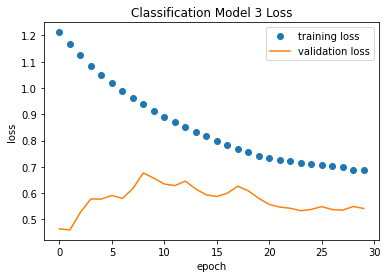

In [151]:
plt.plot(smooth_train_history3,'o')
plt.plot(smooth_mse_history3)
#plt.plot(mse_history3)
plt.title('Classification Model 3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()
#mse_history3[-1]

In [152]:
# Saved model for regmodl3

model3.save("my_model2")

INFO:tensorflow:Assets written to: my_model2/assets


In [132]:
#for layer in model.layers: print(layer.get_config(), layer.get_weights())

#model3.layers[3].get_config()

#np.save("saved_weights.npy", weights)
#array_rain_fall_npy = np.load("saved_weights.npy")



In [153]:
model4 = models.load_model("my_model2")


#val_mse, val_mae = model4.evaluate(Xval,one_hot_val_labels , verbose=1)
loss, accuracy = model4.evaluate(Xval, one_hot_val_labels, verbose=1)
#all_scores.append(val_mae)
#model4.get_weights()

!zip -r /content/my_model2.zip  /content/my_model2

#from google.colab import files
#files.download('my_model.zip')



51/51 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.9268
updating: content/my_model2/ (stored 0%)
updating: content/my_model2/variables/ (stored 0%)
updating: content/my_model2/variables/variables.data-00000-of-00001 (deflated 30%)
updating: content/my_model2/variables/variables.index (deflated 65%)
updating: content/my_model2/assets/ (stored 0%)
updating: content/my_model2/saved_model.pb (deflated 89%)


In [134]:
!unzip my_model2.zip

Archive:  my_model2.zip
replace content/my_model2/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace content/my_model2/variables/variables.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace content/my_model2/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [135]:
accuracy

0.9267692565917969